# Decision Point Price Momentum Oscillator (PMO)

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:dppmo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2017-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,26.952709,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.922541,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.059448,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.361120,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.611729,134247600


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-24,37.037498,37.887501,36.647499,36.707500,35.139694,148676800
2018-12-26,37.075001,39.307499,36.680000,39.292500,37.614281,234330000
2018-12-27,38.959999,39.192501,37.517502,39.037498,37.370174,212468400
2018-12-28,39.375000,39.630001,38.637501,39.057499,37.389320,169165600
2018-12-31,39.632500,39.840000,39.119999,39.435001,37.750702,140014000


In [4]:
# Define the custom smoothing function
def custom_smoothing(df, period):
    smoothing_multiplier = 2 / (period + 1)
    smoothed = [df['Close'].iloc[0]]  # Initialize with the first value
    for i in range(1, len(df)):
        smoothed_value = ((df['Close'].iloc[i] - smoothed[-1]) * smoothing_multiplier) + smoothed[-1]
        smoothed.append(smoothed_value)
    return pd.Series(smoothed, index=df.index)
  
# Calculate the 35-period Custom Smoothing of the daily price change
df['Price Change'] = (df['Close'] / df['Close'].shift(1) * 100) - 100
df['35-period Custom Smoothing'] = custom_smoothing(df, 35)

# Calculate the 20-period Custom Smoothing of the 35-period smoothed price changes
df['20-period Custom Smoothing'] = custom_smoothing(df, 20)

# Calculate the PMO Line
df['PMO Line'] = 10 * df['20-period Custom Smoothing']

# Calculate the PMO Signal Line
df['PMO Signal Line'] = df['PMO Line'].ewm(span=10, adjust=False).mean()

In [5]:
df = df.dropna()
df.head(20)

,Open,High,Low,Close,Adj Close,Volume,Price Change,35-period Custom Smoothing,20-period Custom Smoothing,PMO Line,PMO Signal Line
Date,,,,,,,,,,,
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.922541,84472400,-0.111928,29.035695,29.034405,290.344050,290.369376
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.059448,88774400,0.508536,29.042184,29.045652,290.456522,290.385221
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.361120,127007600,1.114830,29.066368,29.086781,290.867806,290.472963
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.611729,134247600,0.915948,29.104209,29.149706,291.497062,290.659163
2017-01-10,29.692499,29.844999,29.575001,29.777500,27.639582,97848400,0.100851,29.141614,29.209496,292.094961,290.920217
2017-01-11,29.684999,29.982500,29.650000,29.937500,27.788088,110354400,0.537318,29.185830,29.278830,292.788298,291.259869
2017-01-12,29.725000,29.825001,29.552500,29.812500,27.672066,108344800,-0.417537,29.220645,29.329656,293.296556,291.630175
2017-01-13,29.777500,29.905001,29.702499,29.760000,27.623337,104447600,-0.176100,29.250609,29.370641,293.706408,292.007672
2017-01-17,29.584999,30.059999,29.555000,30.000000,27.846102,137759200,0.806451,29.292242,29.430580,294.305797,292.425513


Text(0.5, 0, 'Date')

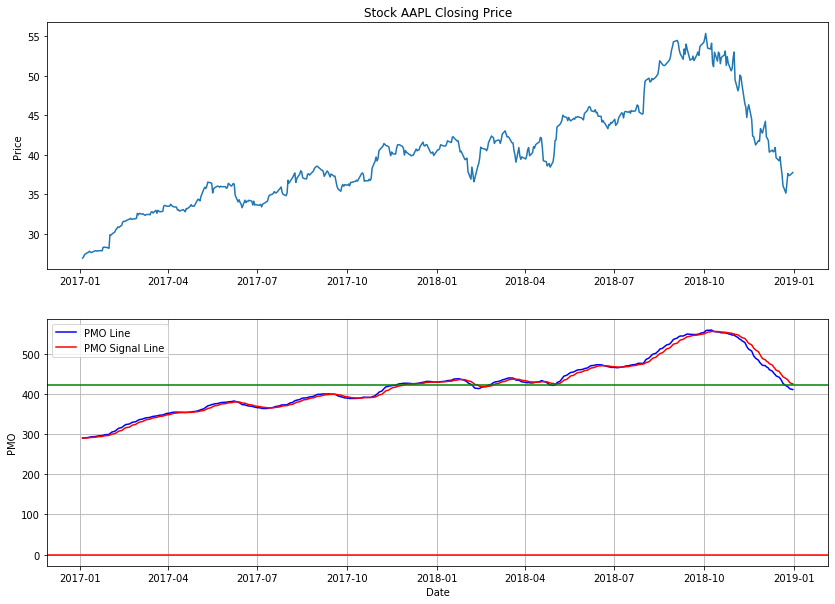

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df.index, df['PMO Line'], label='PMO Line', color='blue')
ax2.plot(df.index, df['PMO Signal Line'], label='PMO Signal Line', color='red')
ax2.axhline(y=df['PMO Line'].mean(), color='green')
ax2.axhline(y=0, color='red')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('PMO')
ax2.set_xlabel('Date')

## Candlestick with PMO

In [7]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,35-period Custom Smoothing,20-period Custom Smoothing,PMO Line,PMO Signal Line,VolumePositive
0,736333.0,28.962500,29.127501,28.937500,29.004999,26.922541,84472400,-0.111928,29.035695,29.034405,290.344050,290.369376,False
1,736334.0,28.980000,29.215000,28.952499,29.152500,27.059448,88774400,0.508536,29.042184,29.045652,290.456522,290.385221,False
2,736335.0,29.195000,29.540001,29.117500,29.477501,27.361120,127007600,1.114830,29.066368,29.086781,290.867806,290.472963,False
3,736338.0,29.487499,29.857500,29.485001,29.747499,27.611729,134247600,0.915948,29.104209,29.149706,291.497062,290.659163,False
4,736339.0,29.692499,29.844999,29.575001,29.777500,27.639582,97848400,0.100851,29.141614,29.209496,292.094961,290.920217,False


Text(0.5, 0, 'Date')

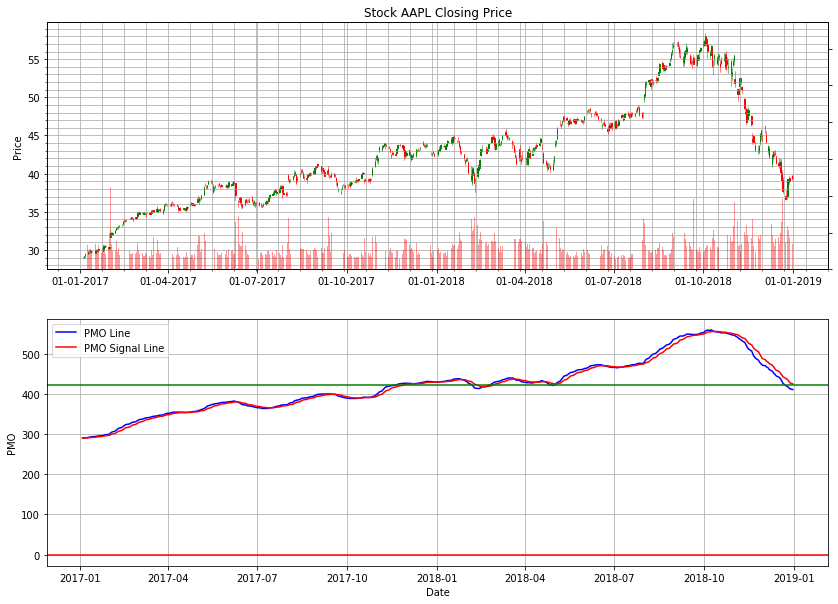

In [8]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df.index, df['PMO Line'], label='PMO Line', color='blue')
ax2.plot(df.index, df['PMO Signal Line'], label='PMO Signal Line', color='red')
ax2.axhline(y=df['PMO Line'].mean(), color='green')
ax2.axhline(y=0, color='red')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('PMO')
ax2.set_xlabel('Date')